In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# Set parameters
batch_size = 5
img_height = 180
img_width = 180
data_dir = 'Set_C/Train'  # Replace with your train directory path

In [4]:
# Load the data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)

Found 70 files belonging to 7 classes.
Using 63 files for training.
Found 70 files belonging to 7 classes.
Using 7 files for validation.


Epoch 1/10
13/13 [==============================] - 23s 667ms/step - loss: 2.3536 - accuracy: 0.1111 - val_loss: 1.9632 - val_accuracy: 0.1429
Epoch 2/10
13/13 [==============================] - 3s 198ms/step - loss: 1.8717 - accuracy: 0.4444 - val_loss: 2.1280 - val_accuracy: 0.1429
Epoch 3/10
13/13 [==============================] - 3s 197ms/step - loss: 1.6684 - accuracy: 0.4921 - val_loss: 2.0554 - val_accuracy: 0.2857
Epoch 4/10
13/13 [==============================] - 3s 229ms/step - loss: 1.1570 - accuracy: 0.6349 - val_loss: 1.0614 - val_accuracy: 0.7143
Epoch 5/10
13/13 [==============================] - 5s 312ms/step - loss: 0.6568 - accuracy: 0.8095 - val_loss: 1.1309 - val_accuracy: 0.7143
Epoch 6/10
13/13 [==============================] - 3s 196ms/step - loss: 0.2724 - accuracy: 0.9524 - val_loss: 1.7275 - val_accuracy: 0.1429
Epoch 7/10
13/13 [==============================] - 3s 199ms/step - loss: 0.0573 - accuracy: 0.9841 - val_loss: 0.6818 - val_accuracy: 0.7143
Epoch

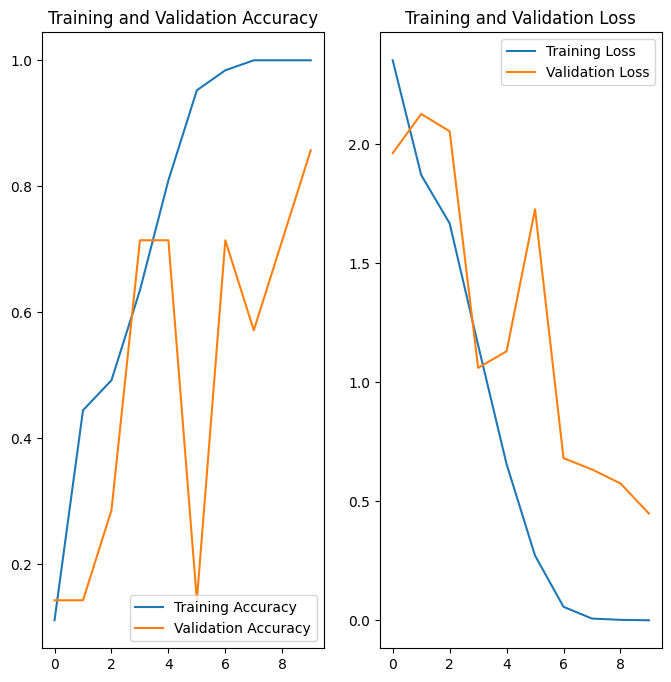

In [5]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [7]:
model.save('best.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Inference

1/1 [==============================] - 0s 210ms/step
This image most likely belongs to 13 - Hoa oi with a 99.90 percent confidence.


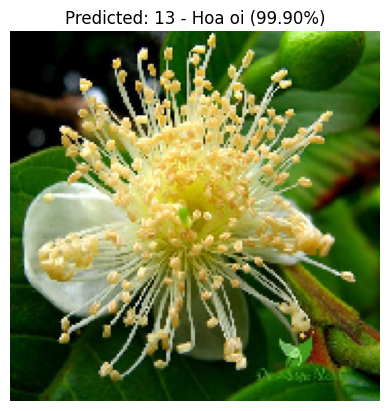

In [8]:
loaded_model = tf.keras.models.load_model('best.hdf5')
from tensorflow.keras.preprocessing import image
image_path = 'Set_C/Test/13_Hoa oi 015.jpg'  # Replace with your image path

# Load and preprocess the image
img = image.load_img(image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make predictions
predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# Get the class with the highest score
predicted_class = class_names[np.argmax(score)]
confidence = 100 * np.max(score)

# Print the results
print(f"This image most likely belongs to {predicted_class} with a {confidence:.2f} percent confidence.")

# Display the image
plt.imshow(img)
plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
plt.axis('off')
plt.show()